Using device: cuda:1
Epoch 10: Train Loss = 0.8101, Val Loss = 5.4051
Epoch 20: Train Loss = 0.8587, Val Loss = 5.8541
Epoch 30: Train Loss = 0.7385, Val Loss = 6.4492
Epoch 40: Train Loss = 0.7056, Val Loss = 6.8347
Epoch 50: Train Loss = 0.7926, Val Loss = 6.5729
Epoch 60: Train Loss = 0.7199, Val Loss = 6.8461
Epoch 70: Train Loss = 0.7549, Val Loss = 6.9567
Epoch 80: Train Loss = 0.6179, Val Loss = 7.4163
Epoch 90: Train Loss = 0.4960, Val Loss = 7.7199
Epoch 100: Train Loss = 0.5194, Val Loss = 7.5778
Epoch 110: Train Loss = 0.7866, Val Loss = 7.5279
Epoch 120: Train Loss = 0.8611, Val Loss = 7.4842
Epoch 130: Train Loss = 0.5976, Val Loss = 7.9014
Epoch 140: Train Loss = 0.5170, Val Loss = 8.1431
Epoch 150: Train Loss = 0.8213, Val Loss = 7.8888
Epoch 160: Train Loss = 1.3300, Val Loss = 7.5049
Epoch 170: Train Loss = 0.7122, Val Loss = 8.3700
Epoch 180: Train Loss = 0.5753, Val Loss = 8.4352
Epoch 190: Train Loss = 0.6220, Val Loss = 8.5015
Epoch 200: Train Loss = 0.4653, Val Lo

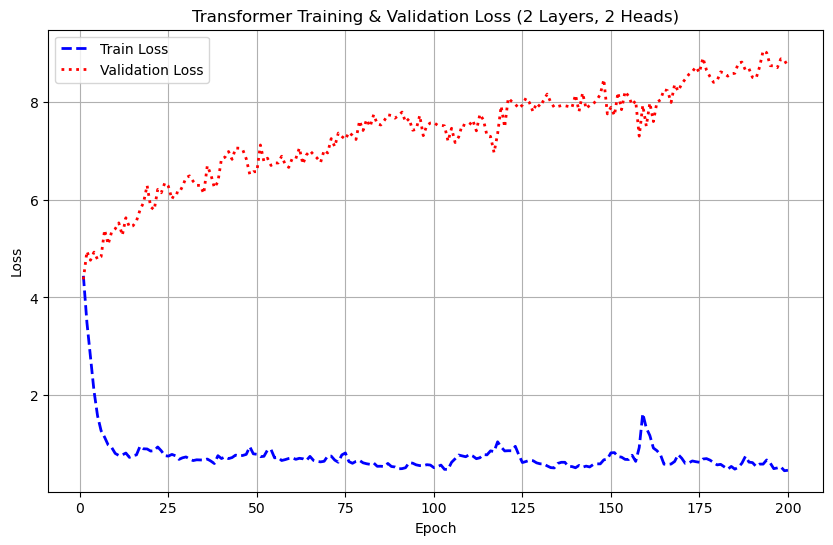

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np
import math


###############################
# 1. Data Preparation
###############################


# Special tokens
PAD_TOKEN = 0
SOS_TOKEN = 1
EOS_TOKEN = 2


# Dataset: (English, French) pairs – we want French as input, English as target.
english_to_french = [
 
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("She studies mathematics at university", "Elle étudie les mathématiques à l'université"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
 
]

# For French-to-English, our source (input) is French and target is English.
fre_sentences = [pair[1] for pair in english_to_french]  # French as input
eng_sentences = [pair[0] for pair in english_to_french]  # English as target


# Tokenization
def tokenize(sentence):
    return sentence.strip().lower().split()


# Build vocabulary from a list of sentences
def build_vocab(sentences):
    vocab = {"<PAD>": PAD_TOKEN, "<SOS>": SOS_TOKEN, "<EOS>": EOS_TOKEN}
    idx = 3
    for sentence in sentences:
        for word in tokenize(sentence):
            if word not in vocab:
                vocab[word] = idx
                idx += 1
    return vocab


# Build vocabularies
fre_vocab = build_vocab(fre_sentences)
eng_vocab = build_vocab(eng_sentences)


# Inverse dictionaries (for decoding)
inv_fre_vocab = {v: k for k, v in fre_vocab.items()}
inv_eng_vocab = {v: k for k, v in eng_vocab.items()}


# Convert a sentence to a list of token indices
def sentence_to_indices(sentence, vocab):
    tokens = [vocab[word] for word in tokenize(sentence)]
    return [SOS_TOKEN] + tokens + [EOS_TOKEN]


# Create data lists
fre_data = [sentence_to_indices(s, fre_vocab) for s in fre_sentences]
eng_data = [sentence_to_indices(s, eng_vocab) for s in eng_sentences]


# Compute maximum lengths (for padding)
max_len_fre = max(len(seq) for seq in fre_data)
max_len_eng = max(len(seq) for seq in eng_data)


# Custom Dataset
class TranslationDataset(Dataset):
    def __init__(self, src_data, tgt_data):
        self.src_data = src_data
        self.tgt_data = tgt_data
    def __len__(self):
        return len(self.src_data)
    def __getitem__(self, idx):
        return (torch.tensor(self.src_data[idx], dtype=torch.long),
                torch.tensor(self.tgt_data[idx], dtype=torch.long))


# Collate function for padding
def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_batch = nn.utils.rnn.pad_sequence(src_batch, batch_first=True, padding_value=PAD_TOKEN)
    tgt_batch = nn.utils.rnn.pad_sequence(tgt_batch, batch_first=True, padding_value=PAD_TOKEN)
    return src_batch, tgt_batch


# Create DataLoaders (80/20 split)
data = list(zip(fre_data, eng_data))
random.shuffle(data)
split_idx = int(0.8 * len(data))
train_data = data[:split_idx]
val_data = data[split_idx:]
train_dataset = TranslationDataset([x[0] for x in train_data], [x[1] for x in train_data])
val_dataset = TranslationDataset([x[0] for x in val_data], [x[1] for x in val_data])
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


###############################
# 2. Model Definitions (Transformer-based)
###############################


# Encoder using TransformerEncoder
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, num_layers=2, nhead=2):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, emb_dim, padding_idx=PAD_TOKEN)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
    def forward(self, src):
        # src: [batch, src_len]
        embedded = self.embedding(src)  # [batch, src_len, emb_dim]
        memory = self.encoder(embedded)   # [batch, src_len, emb_dim]
        return memory


# Decoder using TransformerDecoder
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, num_layers=2, nhead=2):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, emb_dim, padding_idx=PAD_TOKEN)
        decoder_layer = nn.TransformerDecoderLayer(d_model=emb_dim, nhead=nhead, batch_first=True)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.fc_out = nn.Linear(emb_dim, output_dim)
    def forward(self, tgt, memory, tgt_mask=None):
        # tgt: [batch, tgt_len]
        embedded = self.embedding(tgt)  # [batch, tgt_len, emb_dim]
        output = self.decoder(embedded, memory, tgt_mask=tgt_mask)
        output = self.fc_out(output)  # [batch, tgt_len, output_dim]
        return output


# Seq2Seq Transformer Model
class Seq2SeqTransformer(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2SeqTransformer, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
    def forward(self, src, tgt, tgt_mask=None):
        memory = self.encoder(src)
        output = self.decoder(tgt, memory, tgt_mask)
        return output


# Instantiate the transformer model with 2 layers and 2 heads
INPUT_DIM = len(fre_vocab)
OUTPUT_DIM = len(eng_vocab)
EMB_DIM = 256
# For our transformer, we set the model dimension equal to the embedding dimension.
# (We do not use an explicit hidden dimension here.)
num_layers = 2
nhead = 4


encoder_transformer = Encoder(INPUT_DIM, EMB_DIM, hid_dim=EMB_DIM, num_layers=num_layers, nhead=nhead).to(device)
decoder_transformer = Decoder(OUTPUT_DIM, EMB_DIM, num_layers=num_layers, nhead=nhead).to(device)
model_transformer = Seq2SeqTransformer(encoder_transformer, decoder_transformer, device).to(device)


optimizer = optim.Adam(model_transformer.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_TOKEN)


# Generate a square subsequent mask for the target sequence
def generate_square_subsequent_mask(sz):
    mask = torch.triu(torch.ones(sz, sz), diagonal=1)
    mask = mask.masked_fill(mask == 1, float('-inf'))
    return mask


###############################
# 3. Training and Evaluation
###############################


def train_epoch_transformer(model, loader, optimizer, criterion):
    model.train()
    epoch_loss = 0
    for src, tgt in loader:
        src, tgt = src.to(device), tgt.to(device)
        # For training, use all tokens except the last as input to decoder.
        tgt_input = tgt[:, :-1]
        tgt_output = tgt[:, 1:]
        tgt_mask = generate_square_subsequent_mask(tgt_input.size(1)).to(device)
        optimizer.zero_grad()
        output = model(src, tgt_input, tgt_mask=tgt_mask)
        # output: [batch, tgt_len, OUTPUT_DIM]
        output_dim = output.shape[-1]
        output = output.contiguous().view(-1, output_dim)
        tgt_output = tgt_output.contiguous().view(-1)
        loss = criterion(output, tgt_output)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss / len(loader)


def evaluate_transformer(model, loader, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for src, tgt in loader:
            src, tgt = src.to(device), tgt.to(device)
            tgt_input = tgt[:, :-1]
            tgt_output = tgt[:, 1:]
            tgt_mask = generate_square_subsequent_mask(tgt_input.size(1)).to(device)
            output = model(src, tgt_input, tgt_mask=tgt_mask)
            output_dim = output.shape[-1]
            output = output.contiguous().view(-1, output_dim)
            tgt_output = tgt_output.contiguous().view(-1)
            loss = criterion(output, tgt_output)
            epoch_loss += loss.item()
    return epoch_loss / len(loader)


num_epochs = 200
train_losses = []
val_losses = []


for epoch in range(1, num_epochs + 1):
    train_loss = train_epoch_transformer(model_transformer, train_loader, optimizer, criterion)
    val_loss = evaluate_transformer(model_transformer, val_loader, criterion)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")


###############################
# 4. Qualitative Testing: Translation Function
###############################
def translate_sentence_transformer(model, sentence, src_vocab, tgt_inv_vocab, max_len=20):
    model.eval()
    tokens = sentence_to_indices(sentence, src_vocab)
    src_tensor = torch.tensor(tokens, dtype=torch.long).unsqueeze(0).to(device)
    # Start decoder input with SOS_TOKEN
    tgt_input = torch.tensor([SOS_TOKEN], dtype=torch.long).unsqueeze(0).to(device)
    for i in range(max_len):
        tgt_mask = generate_square_subsequent_mask(tgt_input.size(1)).to(device)
        output = model(src_tensor, tgt_input, tgt_mask=tgt_mask)
        next_token = output[:, -1, :].argmax(1).item()
        tgt_input = torch.cat([tgt_input, torch.tensor([[next_token]], dtype=torch.long).to(device)], dim=1)
        if next_token == EOS_TOKEN:
            break
    translated_indices = tgt_input.squeeze(0).tolist()[1:]  # Skip SOS_TOKEN
    translation = " ".join([tgt_inv_vocab.get(idx, "<UNK>") for idx in translated_indices if idx != EOS_TOKEN])
    return translation


print("\n--- Transformer Qualitative Translations (French -> English) ---")
test_sentences = ["Le chat dort", "Ils voyagent à Paris", "Les oiseaux gazouillent le matin"]
for sent in test_sentences:
    translation = translate_sentence_transformer(model_transformer, sent, fre_vocab, inv_eng_vocab, max_len=20)
    print(f"Input (French): {sent}")
    print(f"Predicted English: {translation}\n")


###############################
# 5. Plotting Training Curves
###############################
epochs = list(range(1, num_epochs+1))
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Train Loss", color="blue", linestyle="--", linewidth=2)
plt.plot(epochs, val_losses, label="Validation Loss", color="red", linestyle=":", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Transformer Training & Validation Loss (2 Layers, 2 Heads)")
plt.legend()
plt.grid(True)
plt.show()





